In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BaseURL = 'http://www.data.jma.go.jp/obd/stats/etrn/view/10min_s1.php?prec_no=91&block_no=47917&year=2008&month=09&day=28&view='
res = requests.get(BaseURL)
res.encoding = 'utf-8'
print("encoding: %s" % res.encoding)

encoding: utf-8


In [3]:
A = res.text
soup = BeautifulSoup(A,'html.parser')
srcs = soup.select("#tablefix1 td.data_0_0")

In [4]:
data = []
k = -1
for index, tds in enumerate(srcs):
    if (index+1)%10 == 1:
        data.append([])
        k += 1
    data[k].append(tds.get_text())

In [5]:
rng = pd.date_range('00:10 28/9/2008', periods=24*6, freq='10Min')

In [6]:
datas = pd.DataFrame(data,columns = ['地面氣壓', '海面', '降水量', '氣溫', '相對溼度', '平均風','風向','最大瞬間','風向','日照'], index=rng)

In [7]:
datas = datas.replace('--',-1000)
datas.to_csv('JMA_station.csv')
datas = datas.convert_objects(convert_numeric=True)
datas2 = datas[['地面氣壓','氣溫','降水量']]

C:\Users\mopl2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x480 with 0 Axes>

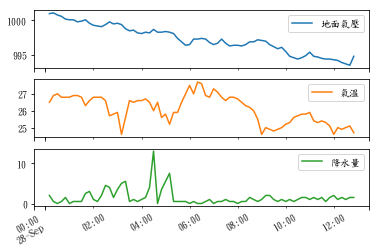

In [8]:
plt.rcParams['font.family']=['DFKai-SB']
plt.figure(dpi=120)
datas2['2008-9-28-00':'2008-9-28-12'].plot(subplots=True)
plt.show()